# Section 2: Post-Processing

## Objectives

We need to combine the two tables using a left join in order to create training data for the machine learning model. This is needed in the tournament in order to find out who is the winner.

## Input Data

The input data would be the combats_cleaned.csv and the pokemon_cleaned.csv file stored under "Dataset/cleaned"

___

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
print("Current working directory:", current_dir)

Current working directory: /Users/danielledelouw/Documents/code_institute/Pokemon_catch_them_all/Pokemon_Catch_Them_All/jupyter_notebooks


We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/Pokemon_catch_them_all/Pokemon_Catch_Them_All'

## Load Python Libraries

In [4]:
#Load python libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [5]:
# Load the Pokemon dataset cleaned
print("Loading Pokemon cleaned dataset")
df_pok = pd.read_csv('Dataset/cleaned/pokemon_cleaned.csv')
df_pok

Loading Pokemon cleaned dataset


,Name,Type_1,Type_2,Total,Hit_points,Attack,Defense,Special_attack,Special_defense,Speed,Has_type_2
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,True
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,True
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,True
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,True
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,True


In [9]:
# Load the Combats dataset cleaned
print("Loading Combats cleaned dataset")
df_com = pd.read_csv('Dataset/cleaned/combats_cleaned.csv')
df_com

Loading Combats cleaned dataset


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
48043,657,681,681
48044,707,126,707
48045,589,664,589
48046,109,89,109


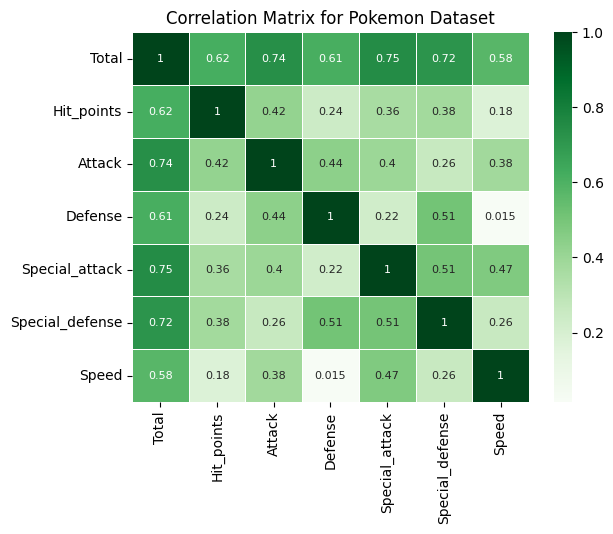

In [6]:
# Select only numeric columns from the Pokemon dataframe
numeric_df = df_pok.select_dtypes(include='number')

# Compute the correlation matrix for the numeric columns
df_pok_corr = numeric_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(
    data=df_pok_corr, 
    annot=True, 
    linewidths=0.5, 
    annot_kws={"size": 8},
    cmap='Greens'
)
plt.title('Correlation Matrix for Pokemon Dataset')
plt.show()
# The correlation matrix shows how strongly each pair of numeric attributes in the Pokemon dataset are related.
# For example, 'Total' has a strong positive correlation with all other stats, especially 'Special_attack' (0.75) and 'Attack' (0.74), 
# which makes sense since 'Total' is the sum of all base stats.
# 'Attack' and 'Defense' are moderately correlated (0.44), while 'Defense' and 'Speed' have almost no correlation (0.02).
# The relatively low correlations between some stats (e.g., 'Hit_points' and 'Speed' at 0.18) suggest that these attributes vary independently.
# Overall, the matrix helps identify which features might provide redundant information and which are more independent, 
# which is useful for feature selection in machine learning models.

In [7]:
# Group by 'Type_1', calculate mean of numeric columns, and sort descending by one of the columns (e.g., 'Total')
grouped_pok = df_pok.groupby('Type_1').mean(numeric_only=True).sort_values(by='Total', ascending=False)
print(grouped_pok)

               Total  Hit_points      Attack     Defense  Special_attack  \
Type_1                                                                     
Dragon    550.531250   83.312500  112.125000   86.375000       96.843750   
Steel     487.703704   65.222222   92.703704  126.370370       67.518519   
Flying    485.000000   70.750000   78.750000   66.250000       94.250000   
Psychic   475.947368   70.631579   71.456140   67.684211       98.403509   
Fire      458.076923   69.903846   84.769231   67.769231       88.980769   
Rock      453.750000   65.363636   92.863636  100.795455       63.340909   
Dark      445.741935   66.806452   88.387097   70.225806       74.645161   
Electric  443.409091   59.795455   69.090909   66.295455       90.022727   
Ghost     439.562500   64.437500   73.781250   81.187500       79.343750   
Ground    437.500000   73.781250   95.750000   84.843750       56.468750   
Ice       433.458333   72.000000   72.750000   71.416667       77.541667   
Water     43

In [8]:
# Create alternating green and gray colors for the bars to improve visual distinction
bar_colors = ['gray' if i % 2 == 0 else 'green' for i in range(len(grouped_pok))]

# Create a bar plot using Plotly to show mean 'Total' power by Type_1
fig = go.Figure(
    data=[
        go.Bar(
            x=grouped_pok.index,      # X-axis: Pokemon Type_1 categories
            y=grouped_pok['Total'],   # Y-axis: Mean 'Total' stat for each type
            marker_color=bar_colors   # Bar colors: alternating green and gray
        )
    ]
)

# Update the layout for better readability and presentation
fig.update_layout(
    title='Mean Total Power by Collective Type 1 Pokemons',
    xaxis_title='Collective Pokemon Type 1',
    yaxis_title='Mean Total Power',
    xaxis_tickangle=45  # Rotate x-axis labels for clarity
)

# Display the plot
fig.show()

# We can see that the highest mean total power is for the 'Dragon' type, followed by 'Psychic' and 'Flying'.
# If you want to win a tournament, you should choose a Dragon type Pokemon. 
# Bug, Rock, and Ice types have the lowest mean total power, indicating they might be less effective in battles.

In [ ]:
# Count occurrences of each Type_1
type1_counts = df_pok['Type_1'].value_counts()

# Plot pie chart
fig = px.pie(
    names=type1_counts.index,
    values=type1_counts.values,
    title='How many Pokemons are grouped in Type 1'
)
fig.show()
# Summary: The pie chart visualizes the distribution of Pokemon by their primary type (Type_1).
# It shows that 'Water' type is the most common, followed by 'Normal' and 'Grass'.
# Types like 'Flying' and 'Fairy' are much less frequent.
# This distribution can influence team composition and strategy in tournaments.
# Dragons are rare, but they have the highest mean total power, making them valuable despite their scarcity.

In [9]:
# Summary: The bar charts display the total stats of Pokemons grouped by their primary type (Type_1).
# Filter for Dragon type only and sort by 'Total' descending
dragon_df = df_pok[df_pok['Type_1'] == 'Dragon'].sort_values(by='Total', ascending=False)

fig = px.bar(
    dragon_df,
    x='Total',
    y='Name',
    title='Dragon Type Pokemons - Strongest Pokemons',
    labels={'Name': 'Pokemon Name', 'Total': 'Total Stat'},
    color='Total',  # Color by Name, not by Total
    
)
fig.update_layout(xaxis_tickangle=45, showlegend=False)
fig.show()
# Summary: The bar chart above displays all Dragon type Pokemons sorted by their total base stats.
# Mega evolutions like RayquazaMega Rayquaza and LatiasMega Latias have the highest total stats, reaching up to 780.
# Standard Dragon types such as Dragonite and Salamence also have high total stats (600+), making them strong choices.
# The chart highlights the dominance of Mega and Legendary Dragon types in terms of overall power.
# If you want the strongest Dragon, prioritize Mega evolutions or Legendary forms.


In [62]:
 #Filter for Bug type only and sort by 'Total' descending
Bug_df = df_pok[df_pok['Type_1'] == 'Bug'].sort_values(by='Total', ascending=False)

fig = px.bar(
    Bug_df,
    x='Total',
    y='Name',
    title='Bug Type Pokemons - Weakest Pokemons',
    labels={'Name': 'Pokemon Name', 'Total': 'Total Stat'},
    color='Total',  # Color by Name, not by Total
    
)
fig.update_layout(xaxis_tickangle=45, showlegend=False)
fig.show()

# Summary: The bar chart above displays all Bug type Pokemons sorted by their total base stats (ascending).
# The lowest total stats belong to early-stage Bug types like Kricketot, Caterpie, and Wurmple (around 194–200).
# The highest total stats (600) are held by Mega evolutions and Legendary Bug types such as ScizorMega Scizor, HeracrossMega Heracross, PinsirMega Pinsir, and Genesect.
# Most Bug types have lower total stats compared to other types, which is reflected in the mean 'Total' for Bug types being the lowest among all primary types.
# This suggests Bug types are generally less powerful in terms of base stats, making them less favorable for competitive battles.

In [10]:
# Sort grouped_pok by 'Hit_points' descending
grouped_pok_sorted_hit = grouped_pok.sort_values(by='Hit_points', ascending=False)

# Create alternating green and gray colors for the bars to improve visual distinction
bar_colors = ['gray' if i % 2 == 0 else 'green' for i in range(len(grouped_pok_sorted_hit))]

# Create a bar plot using Plotly to show mean 'Hit_points' by Type_1
fig = go.Figure(
    data=[
        go.Bar(
            x=grouped_pok_sorted_hit.index,            # X-axis: Pokemon Type_1 categories
            y=grouped_pok_sorted_hit['Hit_points'],    # Y-axis: Mean 'Hit_points' stat for each type
            marker_color=bar_colors                # Bar colors: alternating green and gray
        )
    ]
)

# Update the layout for better readability and presentation
fig.update_layout(
    title='Mean Hit Points by Collective Type 1 Pokemons',  # Chart title
    xaxis_title='Collective Pokemon Type 1',                # X-axis label
    yaxis_title='Mean Hit Points',                          # Y-axis label
    xaxis_tickangle=45                                      # Rotate x-axis labels for clarity
)

# Display the plot
fig.show()
# Summary: The bar chart above displays the mean Hit Points (HP) for each primary Pokemon type.
# Dragon types have the highest average HP, followed by Normal and Fairy types.
# Bug types have the lowest mean HP, indicating they are generally less durable in battles.
# This information is useful for selecting Pokemon types that can withstand more damage, which is important for defensive strategies.


In [11]:
# Sort grouped_pok by 'Attack' descending
grouped_pok_sorted_at = grouped_pok.sort_values(by='Attack', ascending=False)

# Create alternating green and gray colors for the bars to improve visual distinction
bar_colors = ['gray' if i % 2 == 0 else 'green' for i in range(len(grouped_pok_sorted_at))]

# Create a bar plot using Plotly to show mean 'Hit_points' by Type_1
fig = go.Figure(
    data=[
        go.Bar(
            x=grouped_pok_sorted_at.index,            # X-axis: Pokemon Type_1 categories
            y=grouped_pok_sorted_at['Attack'],    # Y-axis: Mean 'Attack' stat for each type
            marker_color=bar_colors                # Bar colors: alternating green and gray
        )
    ]
)

# Update the layout for better readability and presentation
fig.update_layout(
    title='Mean Attack by Collective Type 1 Pokemons',  # Chart title
    xaxis_title='Collective Pokemon Type 1',                # X-axis label
    yaxis_title='Mean Attack Points',                          # Y-axis label
    xaxis_tickangle=45                                      # Rotate x-axis labels for clarity
)

# Display the plot
fig.show()
# Summary: The bar chart above displays the mean Attack stat for each primary Pokemon type.
# Dragon types have the highest mean Attack, followed by Fighting, Ground, Rock, and Steel types.
# Bug, Fairy, and Electric types have the lowest mean Attack, indicating they are less effective in physical offense.
# This information is useful for selecting Pokemon types with strong physical attack capabilities for competitive battles.


In [12]:
# Sort grouped_pok by 'Attack' descending
grouped_pok_sorted_def = grouped_pok.sort_values(by='Defense', ascending=False)

# Create alternating green and gray colors for the bars to improve visual distinction
bar_colors = ['gray' if i % 2 == 0 else 'green' for i in range(len(grouped_pok_sorted_def))]

# Create a bar plot using Plotly to show mean 'Hit_points' by Type_1
fig = go.Figure(
    data=[
        go.Bar(
            x=grouped_pok_sorted_def.index,            # X-axis: Pokemon Type_1 categories
            y=grouped_pok_sorted_def['Defense'],    # Y-axis: Mean 'Defense' stat for each type
            marker_color=bar_colors                # Bar colors: alternating green and gray
        )
    ]
)

# Update the layout for better readability and presentation
fig.update_layout(
    title='Mean Defense by Collective Type 1 Pokemons',  # Chart title
    xaxis_title='Collective Pokemon Type 1',                # X-axis label
    yaxis_title='Mean Defense Points',                          # Y-axis label
    xaxis_tickangle=45                                      # Rotate x-axis labels for clarity
)

# Display the plot
fig.show()
# Summary: The bar chart above displays the mean Defense stat for each primary Pokemon type.
# Steel types have the highest mean Defense by a significant margin, followed by Rock and Dragon types.
# Bug, Dark, and Grass types have much lower mean Defense, making them more vulnerable to physical attacks.
# This information is useful for selecting Pokemon types that can withstand physical damage in battles.


In [13]:
# Sort grouped_pok by 'Special_attack' descending
grouped_pok_sorted_sp_at = grouped_pok.sort_values(by='Special_attack', ascending=False)

# Create alternating green and gray colors for the bars to improve visual distinction
bar_colors = ['gray' if i % 2 == 0 else 'green' for i in range(len(grouped_pok_sorted_sp_at))]

# Create a bar plot using Plotly to show mean 'Hit_points' by Type_1
fig = go.Figure(
    data=[
        go.Bar(
            x=grouped_pok_sorted_sp_at.index,            # X-axis: Pokemon Type_1 categories
            y=grouped_pok_sorted_sp_at['Special_attack'],    # Y-axis: Mean 'Special_attack' stat for each type
            marker_color=bar_colors                # Bar colors: alternating green and gray
        )
    ]
)

# Update the layout for better readability and presentation
fig.update_layout(
    title='Mean Special Attack by Collective Type 1 Pokemons',  # Chart title
    xaxis_title='Collective Pokemon Type 1',                # X-axis label
    yaxis_title='Mean Special Attack Points',                          # Y-axis label
    xaxis_tickangle=45                                      # Rotate x-axis labels for clarity
)

# Display the plot
fig.show()
# Summary: The bar chart above displays the mean Special Attack stat for each primary Pokemon type.
# Psychic and Dragon types have the highest mean Special Attack, making them strong choices for special offense.
# Flying, Electric, and Fire types also have high mean Special Attack values.
# Bug and Fighting types have the lowest mean Special Attack, indicating they are less effective with special moves.
# This information is valuable for selecting Pokemon with strong special attack capabilities for competitive battles.


In [14]:
# Sort grouped_pok by 'Special_defense' descending
grouped_pok_sorted_sp_de = grouped_pok.sort_values(by='Special_defense', ascending=False)

# Create alternating green and gray colors for the bars to improve visual distinction
bar_colors = ['gray' if i % 2 == 0 else 'green' for i in range(len(grouped_pok_sorted_sp_de))]

# Create a bar plot using Plotly to show mean 'Hit_points' by Type_1
fig = go.Figure(
    data=[
        go.Bar(
            x=grouped_pok_sorted_sp_de.index,            # X-axis: Pokemon Type_1 categories
            y=grouped_pok_sorted_sp_de['Special_defense'],    # Y-axis: Mean 'Special_defense' stat for each type
            marker_color=bar_colors                # Bar colors: alternating green and gray
        )
    ]
)

# Update the layout for better readability and presentation
fig.update_layout(
    title='Mean Special Defense by Collective Type 1 Pokemons',  # Chart title
    xaxis_title='Collective Pokemon Type 1',                # X-axis label
    yaxis_title='Mean Special Defense Points',                          # Y-axis label
    xaxis_tickangle=45                                      # Rotate x-axis labels for clarity
)

# Display the plot
fig.show()
# Summary: The bar chart above displays the mean Special Defense stat for each primary Pokemon type.
# Dragon, Psychic, and Fairy types have the highest mean Special Defense, making them more resilient against special attacks.
# Bug, Fighting, and Poison types have the lowest mean Special Defense, indicating a vulnerability to special moves.
# This information is useful for team building and strategy, especially when anticipating opponents who rely on special attacks.


In [86]:
# Sort grouped_pok by 'Speed' descending
grouped_pok_sorted_speed = grouped_pok.sort_values(by='Speed', ascending=False)

# Create alternating green and gray colors for the bars to improve visual distinction
bar_colors = ['gray' if i % 2 == 0 else 'green' for i in range(len(grouped_pok_sorted_speed))]

# Create a bar plot using Plotly to show mean 'Hit_points' by Type_1
fig = go.Figure(
    data=[
        go.Bar(
            x=grouped_pok_sorted_speed.index,            # X-axis: Pokemon Type_1 categories
            y=grouped_pok_sorted_speed['Speed'],    # Y-axis: Mean 'Speed' stat for each type
            marker_color=bar_colors                # Bar colors: alternating green and gray
        )
    ]
)

# Update the layout for better readability and presentation
fig.update_layout(
    title='Mean Speed by Collective Type 1 Pokemons',  # Chart title
    xaxis_title='Collective Pokemon Type 1',                # X-axis label
    yaxis_title='Mean Speed Points',                          # Y-axis label
    xaxis_tickangle=45                                      # Rotate x-axis labels for clarity
)

# Display the plot
fig.show()

In [15]:

# Count occurrences of each value in 'Has Type 2'
has_type2_counts = df_pok['Has_type_2'].value_counts()

# Plot pie chart
fig = px.pie(
    names=['No Type 2' if val == 0 else 'Has_type_2' for val in has_type2_counts.index],
    values=has_type2_counts.values,
    title='How many Pokemons has a Type 2 ability?'
)
fig.show()
# Summary: The pie chart shows the proportion of Pokemons that have a secondary type (Type 2) versus those that do not.
# In this dataset, slightly more than half of the Pokemons have a Type 2 ability (414 out of 800), while 386 do not.
# Having a secondary type can provide additional strengths and weaknesses in battles, making these Pokemons more versatile.
# However, single-type Pokemons may have fewer weaknesses and can be easier to strategize with.


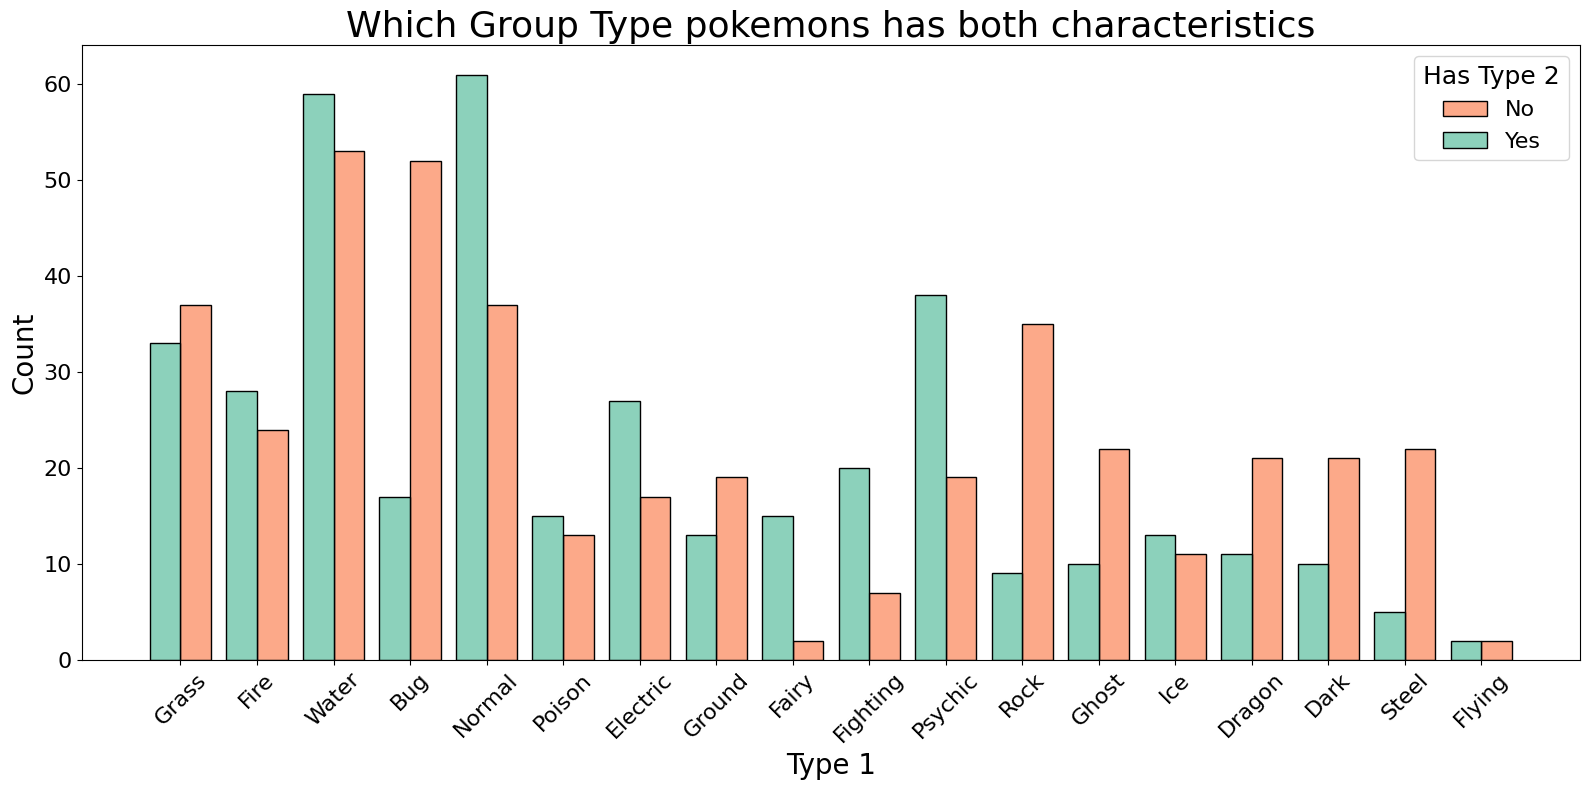

In [16]:
plt.figure(figsize=(16, 8))
sns.histplot(
    data=df_pok,
    x='Type_1',
    hue='Has_type_2',
    multiple='dodge',
    shrink=0.8,
    palette='Set2',
    discrete=True
)
plt.title('Which Group Type pokemons has both characteristics', fontsize=26)
plt.xlabel('Type 1', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Has Type 2', labels=['No', 'Yes'], fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()

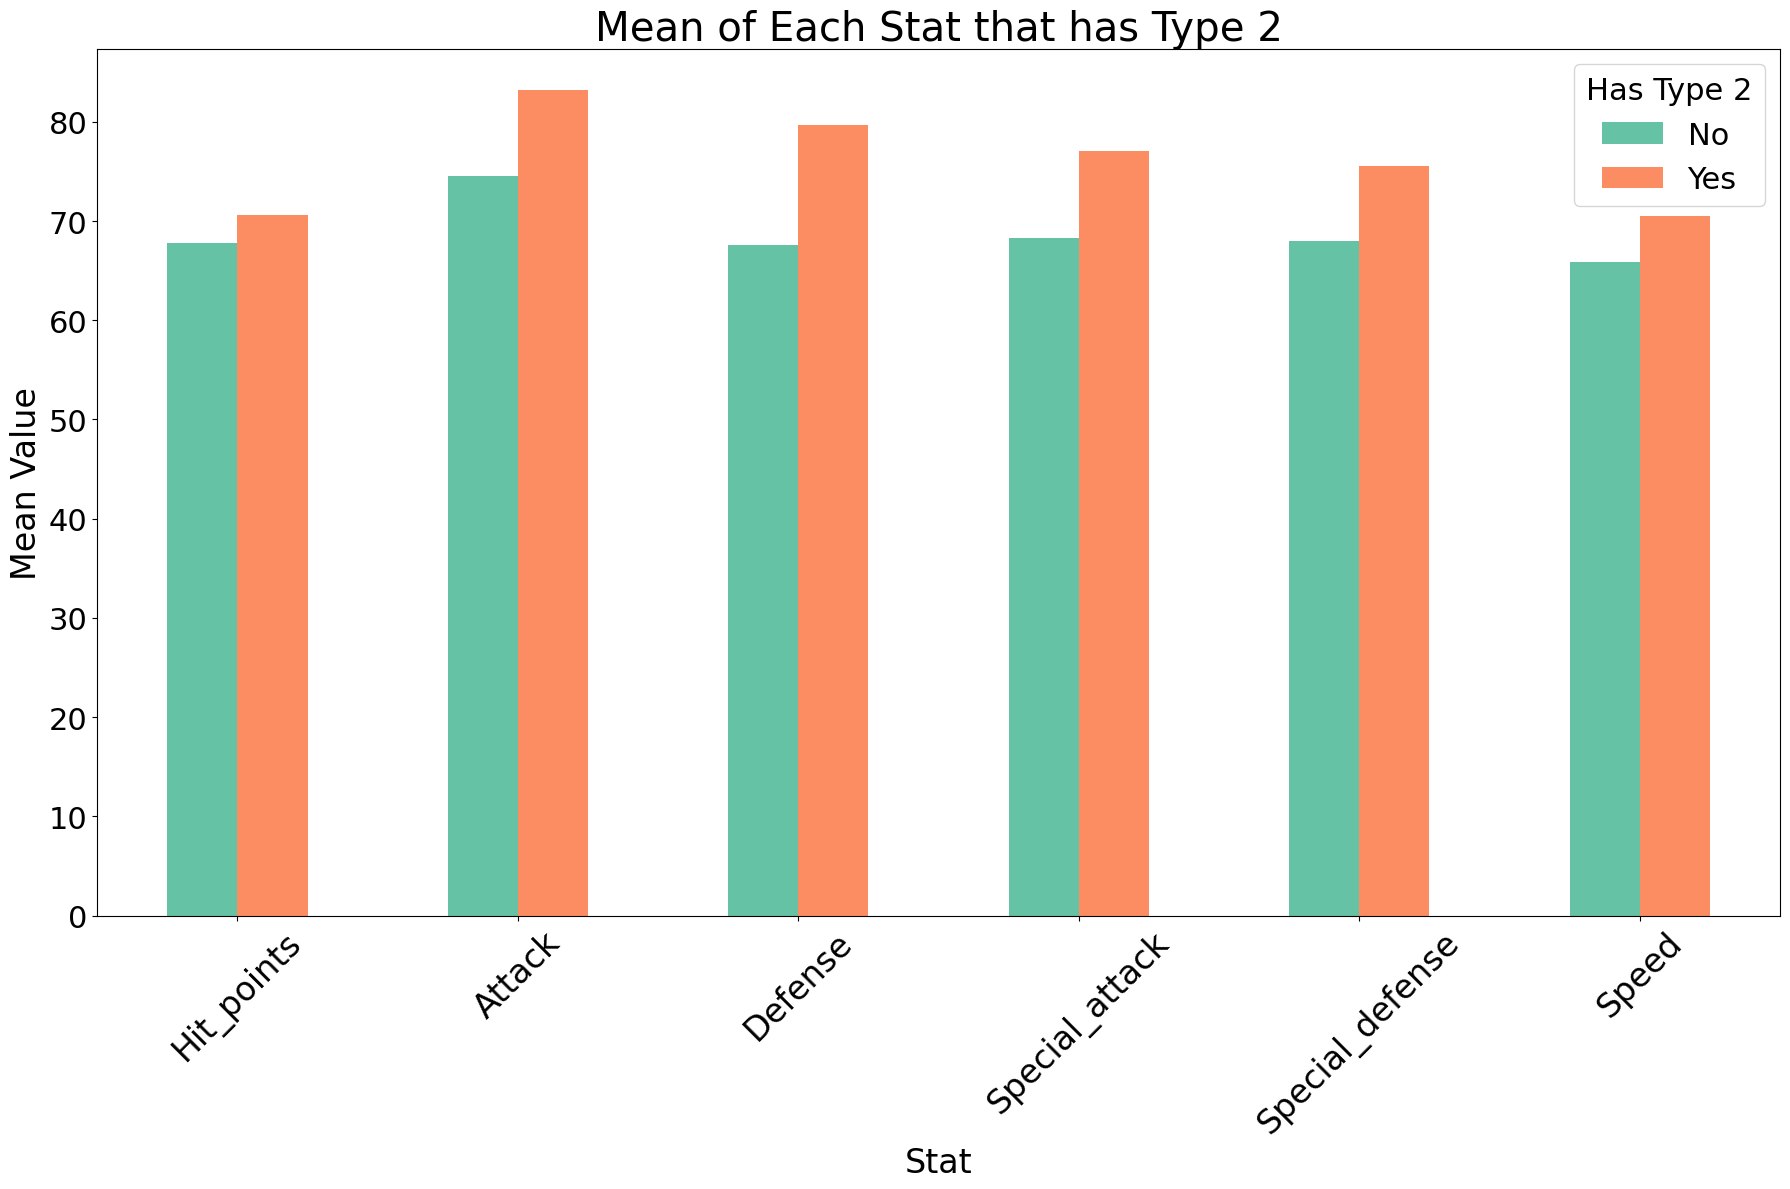

In [24]:
grouped_pok_no_tot = grouped_pok.drop(columns=['Total', 'Has_type_2'])

# Calculate the mean of each column in grouped_pok_no_tot, grouped by Has_type_2
means_by_type2 = df_pok.groupby('Has_type_2')[grouped_pok_no_tot.columns].mean().T
means_by_type2.columns = ['No', 'Yes']

# Plot the means as a grouped bar chart (histogram style)
means_by_type2.plot(
    kind='bar',
    figsize=(18, 12),
    color=['#66c2a5', '#fc8d62']
)
plt.title('Mean of Each Stat that has Type 2', fontsize=29)
plt.xlabel('Stat', fontsize=24)
plt.ylabel('Mean Value', fontsize=24)
plt.xticks(rotation=45, fontsize=24)
plt.yticks(fontsize=22)
plt.legend(title='Has Type 2', fontsize=22, title_fontsize=22)
plt.tight_layout()
plt.show()
# Summary: The grouped bar chart compares the mean values of each stat for Pokemons with and without a secondary type (Type 2).
# Pokemons with a Type 2 ability ("Yes") have higher mean values across all stats compared to those without ("No").
# The largest differences are observed in Attack and Defense, suggesting that dual-type Pokemons tend to be stronger overall.
# This supports the idea that having a secondary type may provide not only more versatility but also generally better base stats.


## Preparing tables for Left Join

In [107]:
# To make more sense of the comboats dataset, we need to join the tables
# Add a new column called 'id' starting at 1 and ending at the last row number
df_pok['id'] = range(1, len(df_pok) + 1)
df_pok

,Name,Type_1,Type_2,Total,Hit_points,Attack,Defense,Special_attack,Special_defense,Speed,Has_type_2,Mean_Stats,id
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,True,45.571429,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,True,58.0,2
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,True,75.142857,3
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,True,89.428571,4
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False,44.142857,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,True,85.857143,796
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True,100.142857,797
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True,85.857143,798
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,True,97.285714,799


In [ ]:
df_pok_char = df_pok[['id', 'Name', 'Type_1', 'Total', 'Hit_points', 'Attack', 'Defense', 'Special_attack', 'Special_defense', 'Speed']]
df_pok_char

#preparing table just using type 1's characteristics with no Type 2, this is done to prepare the table when merging with first pokemon and second pokemon of combats table

,id,Name,Type_1,Total,Hit_points,Attack,Defense,Special_attack,Special_defense,Speed
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,405,60,62,63,80,80,60
2,3,Venusaur,Grass,525,80,82,83,100,100,80
3,4,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80
4,5,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,600,50,100,150,100,150,50
796,797,DiancieMega Diancie,Rock,700,50,160,110,160,110,110
797,798,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70
798,799,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80


In [ ]:
# Perform a left join between the combats dataset and the selected Pokemon characteristics
# This merges the characteristics of the first Pokemon in each combat into the combats dataframe
df_joined_type1 = df_com.merge(df_pok_char, left_on='First_pokemon', right_on='id', how='left')
df_joined_type1

,First_pokemon,Second_pokemon,Winner,id,Name,Type_1,Total,Hit_points,Attack,Defense,Special_attack,Special_defense,Speed
0,266,298,298,266,Larvitar,Rock,300,50,64,50,45,50,41
1,702,701,701,702,Virizion,Grass,580,91,90,72,90,129,108
2,191,668,668,191,Togetic,Fairy,405,55,40,85,80,105,40
3,237,683,683,237,Slugma,Fire,250,40,40,40,70,40,20
4,151,231,151,151,Omastar,Rock,495,70,60,125,115,70,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,657,681,681,657,Joltik,Bug,319,50,47,50,57,50,65
48044,707,126,707,707,Reshiram,Dragon,680,100,120,100,150,120,90
48045,589,664,589,589,Drilbur,Ground,328,60,85,40,30,45,68
48046,109,89,109,109,Voltorb,Electric,330,40,30,50,55,55,100


In [110]:
df_joined_type1 = df_joined_type1.rename(columns={
    'Name': 'First_Name',
    'Type_1': 'First_Type_1',
    'Total': 'First_Total',
    'Hit_points': 'First_Hit_points',
    'Attack': 'First_Attack',
    'Defense': 'First_Defense',
    'Special_attack': 'First_Special_attack',
    'Special_defense': 'First_Special_defense',
    'Speed': 'First_Speed'
})
df_joined_type1

# this is done because we also want to merge the second Pokemon characteristics for the ML model


,First_pokemon,Second_pokemon,Winner,id,First_Name,First_Type_1,First_Total,First_Hit_points,First_Attack,First_Defense,First_Special_attack,First_Special_defense,First_Speed
0,266,298,298,266,Larvitar,Rock,300,50,64,50,45,50,41
1,702,701,701,702,Virizion,Grass,580,91,90,72,90,129,108
2,191,668,668,191,Togetic,Fairy,405,55,40,85,80,105,40
3,237,683,683,237,Slugma,Fire,250,40,40,40,70,40,20
4,151,231,151,151,Omastar,Rock,495,70,60,125,115,70,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,657,681,681,657,Joltik,Bug,319,50,47,50,57,50,65
48044,707,126,707,707,Reshiram,Dragon,680,100,120,100,150,120,90
48045,589,664,589,589,Drilbur,Ground,328,60,85,40,30,45,68
48046,109,89,109,109,Voltorb,Electric,330,40,30,50,55,55,100


In [111]:
df_joined_type2 = df_joined_type1.merge(df_pok_char, left_on='Second_pokemon', right_on='id', how='left')
df_joined_type2

,First_pokemon,Second_pokemon,Winner,id_x,First_Name,First_Type_1,First_Total,First_Hit_points,First_Attack,First_Defense,...,id_y,Name,Type_1,Total,Hit_points,Attack,Defense,Special_attack,Special_defense,Speed
0,266,298,298,266,Larvitar,Rock,300,50,64,50,...,298,Nuzleaf,Grass,340,70,70,40,60,40,60
1,702,701,701,702,Virizion,Grass,580,91,90,72,...,701,Terrakion,Rock,580,91,129,90,72,90,108
2,191,668,668,191,Togetic,Fairy,405,55,40,85,...,668,Beheeyem,Psychic,485,75,75,75,125,95,40
3,237,683,683,237,Slugma,Fire,250,40,40,40,...,683,Druddigon,Dragon,485,77,120,90,60,90,48
4,151,231,151,151,Omastar,Rock,495,70,60,125,...,231,Shuckle,Bug,505,20,10,230,10,230,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,657,681,681,657,Joltik,Bug,319,50,47,50,...,681,Mienfoo,Fighting,350,45,85,50,55,50,65
48044,707,126,707,707,Reshiram,Dragon,680,100,120,100,...,126,Horsea,Water,295,30,40,70,70,25,60
48045,589,664,589,589,Drilbur,Ground,328,60,85,40,...,664,Tynamo,Electric,275,35,55,40,45,40,60
48046,109,89,109,109,Voltorb,Electric,330,40,30,50,...,89,Magnemite,Electric,325,25,35,70,95,55,45


In [ ]:
df_joined_type2 = df_joined_type2.rename(columns={
    'Name': 'Second_Name',
    'Type_1': 'Second_Type_1',
    'Total': 'Second_Total',
    'Hit_points': 'Second_Hit_points',
    'Attack': 'Second_Attack',
    'Defense': 'Second_Defense',
    'Special_attack': 'Second_Special_attack',
    'Special_defense': 'Second_Special_defense',
    'Speed': 'Second_Speed'
})
df_joined_type2
#renamed the columns to make it clear which Pokemon's characteristics are being referred to

,First_pokemon,Second_pokemon,Winner,id_x,First_Name,First_Type_1,First_Total,First_Hit_points,First_Attack,First_Defense,...,id_y,Second_Name,Second_Type_1,Second_Total,Second_Hit_points,Second_Attack,Second_Defense,Second_Special_attack,Second_Special_defense,Second_Speed
0,266,298,298,266,Larvitar,Rock,300,50,64,50,...,298,Nuzleaf,Grass,340,70,70,40,60,40,60
1,702,701,701,702,Virizion,Grass,580,91,90,72,...,701,Terrakion,Rock,580,91,129,90,72,90,108
2,191,668,668,191,Togetic,Fairy,405,55,40,85,...,668,Beheeyem,Psychic,485,75,75,75,125,95,40
3,237,683,683,237,Slugma,Fire,250,40,40,40,...,683,Druddigon,Dragon,485,77,120,90,60,90,48
4,151,231,151,151,Omastar,Rock,495,70,60,125,...,231,Shuckle,Bug,505,20,10,230,10,230,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,657,681,681,657,Joltik,Bug,319,50,47,50,...,681,Mienfoo,Fighting,350,45,85,50,55,50,65
48044,707,126,707,707,Reshiram,Dragon,680,100,120,100,...,126,Horsea,Water,295,30,40,70,70,25,60
48045,589,664,589,589,Drilbur,Ground,328,60,85,40,...,664,Tynamo,Electric,275,35,55,40,45,40,60
48046,109,89,109,109,Voltorb,Electric,330,40,30,50,...,89,Magnemite,Electric,325,25,35,70,95,55,45


In [115]:
df_joined_type2.info()
# checking the data types of the columns to ensure they are correct for the ML model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   First_pokemon           48048 non-null  int64 
 1   Second_pokemon          48048 non-null  int64 
 2   Winner                  48048 non-null  int64 
 3   id_x                    48048 non-null  int64 
 4   First_Name              48048 non-null  object
 5   First_Type_1            48048 non-null  object
 6   First_Total             48048 non-null  int64 
 7   First_Hit_points        48048 non-null  int64 
 8   First_Attack            48048 non-null  int64 
 9   First_Defense           48048 non-null  int64 
 10  First_Special_attack    48048 non-null  int64 
 11  First_Special_defense   48048 non-null  int64 
 12  First_Speed             48048 non-null  int64 
 13  id_y                    48048 non-null  int64 
 14  Second_Name             48048 non-null  object
 15  Se

In [ ]:
df_joined_type2 = df_joined_type2.drop(columns=['First_Name', 'Second_Name'])
df_joined_type2.head()
# Dropping the 'First_Name' and 'Second_Name' columns as they are not needed

,First_pokemon,Second_pokemon,Winner,id_x,First_Type_1,First_Total,First_Hit_points,First_Attack,First_Defense,First_Special_attack,...,First_Speed,id_y,Second_Type_1,Second_Total,Second_Hit_points,Second_Attack,Second_Defense,Second_Special_attack,Second_Special_defense,Second_Speed
0,266,298,298,266,Rock,300,50,64,50,45,...,41,298,Grass,340,70,70,40,60,40,60
1,702,701,701,702,Grass,580,91,90,72,90,...,108,701,Rock,580,91,129,90,72,90,108
2,191,668,668,191,Fairy,405,55,40,85,80,...,40,668,Psychic,485,75,75,75,125,95,40
3,237,683,683,237,Fire,250,40,40,40,70,...,20,683,Dragon,485,77,120,90,60,90,48
4,151,231,151,151,Rock,495,70,60,125,115,...,55,231,Bug,505,20,10,230,10,230,5


In [ ]:
df_joined_type2['target'] = (df_joined_type2['Winner'] == df_joined_type2['First_pokemon']).astype(int)
df_joined_type2
# Creating a target column where 1 indicates the first Pokemon won and 0 indicates the second Pokemon won

,First_pokemon,Second_pokemon,Winner,id_x,First_Type_1,First_Total,First_Hit_points,First_Attack,First_Defense,First_Special_attack,...,id_y,Second_Type_1,Second_Total,Second_Hit_points,Second_Attack,Second_Defense,Second_Special_attack,Second_Special_defense,Second_Speed,target
0,266,298,298,266,Rock,300,50,64,50,45,...,298,Grass,340,70,70,40,60,40,60,0
1,702,701,701,702,Grass,580,91,90,72,90,...,701,Rock,580,91,129,90,72,90,108,0
2,191,668,668,191,Fairy,405,55,40,85,80,...,668,Psychic,485,75,75,75,125,95,40,0
3,237,683,683,237,Fire,250,40,40,40,70,...,683,Dragon,485,77,120,90,60,90,48,0
4,151,231,151,151,Rock,495,70,60,125,115,...,231,Bug,505,20,10,230,10,230,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,657,681,681,657,Bug,319,50,47,50,57,...,681,Fighting,350,45,85,50,55,50,65,0
48044,707,126,707,707,Dragon,680,100,120,100,150,...,126,Water,295,30,40,70,70,25,60,1
48045,589,664,589,589,Ground,328,60,85,40,30,...,664,Electric,275,35,55,40,45,40,60,1
48046,109,89,109,109,Electric,330,40,30,50,55,...,89,Electric,325,25,35,70,95,55,45,1


In [ ]:
features = [
    'First_Hit_points', 'First_Attack', 'First_Defense', 'First_Special_attack', 'First_Special_defense',
    'Second_Hit_points', 'Second_Attack', 'Second_Defense', 'Second_Special_attack', 'Second_Special_defense'
]
# Selecting the features to be used in the ML model
X = df_joined_type2[features]
y = df_joined_type2['target']
# Splitting the data into features (X) and target (y)
#preview of the features and target for the ML model

In [ ]:
df_joined_type2
#checking the final dataframe before saving it to a CSV file

,First_pokemon,Second_pokemon,Winner,id_x,First_Type_1,First_Total,First_Hit_points,First_Attack,First_Defense,First_Special_attack,...,id_y,Second_Type_1,Second_Total,Second_Hit_points,Second_Attack,Second_Defense,Second_Special_attack,Second_Special_defense,Second_Speed,target
0,266,298,298,266,Rock,300,50,64,50,45,...,298,Grass,340,70,70,40,60,40,60,0
1,702,701,701,702,Grass,580,91,90,72,90,...,701,Rock,580,91,129,90,72,90,108,0
2,191,668,668,191,Fairy,405,55,40,85,80,...,668,Psychic,485,75,75,75,125,95,40,0
3,237,683,683,237,Fire,250,40,40,40,70,...,683,Dragon,485,77,120,90,60,90,48,0
4,151,231,151,151,Rock,495,70,60,125,115,...,231,Bug,505,20,10,230,10,230,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,657,681,681,657,Bug,319,50,47,50,57,...,681,Fighting,350,45,85,50,55,50,65,0
48044,707,126,707,707,Dragon,680,100,120,100,150,...,126,Water,295,30,40,70,70,25,60,1
48045,589,664,589,589,Ground,328,60,85,40,30,...,664,Electric,275,35,55,40,45,40,60,1
48046,109,89,109,109,Electric,330,40,30,50,55,...,89,Electric,325,25,35,70,95,55,45,1


In [ ]:
#Load Data to "Dataset/cleaned":
#df_joined_type2.to_csv('Dataset/cleaned/combined_ml.csv', index=False)